In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data_file = 'data/zhengqi_train.txt'
test_data_file = 'data/zhengqi_test.txt'

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

## 异常值分析

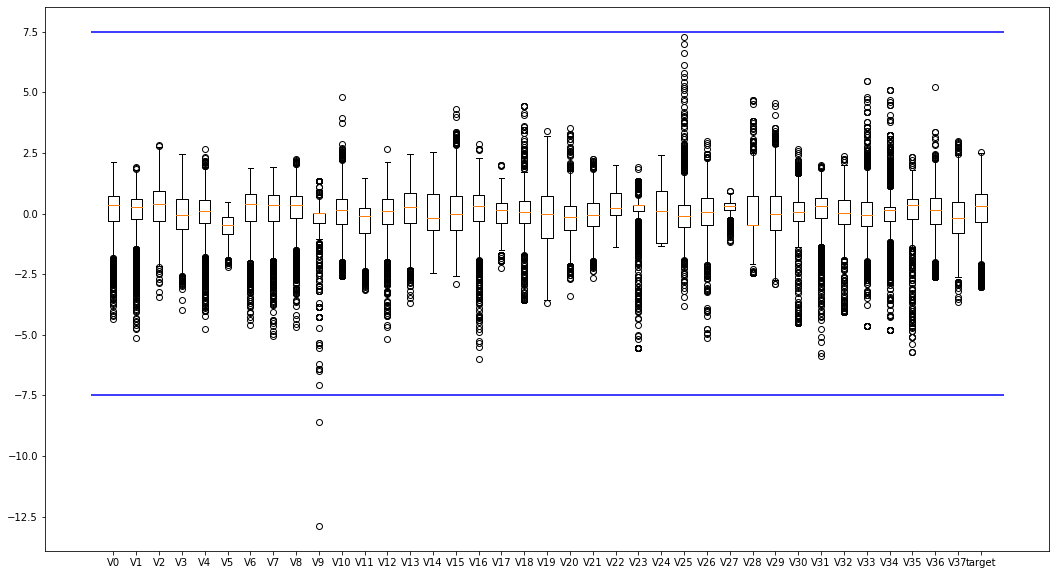

In [3]:
plt.figure(figsize = (18, 10))
plt.boxplot(x = train_data.values, labels = train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors = 'b')
plt.show()

In [4]:
# 可以看到V9变量有非常明显的异常值，删去异常值
train_data = train_data[train_data['V9'] > -7.5]
display(train_data.describe())
display(test_data.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


## MinMax归一化

In [5]:
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
# 注意：仅fit训练集，transform到训练和测试集
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

## 查看数据分布

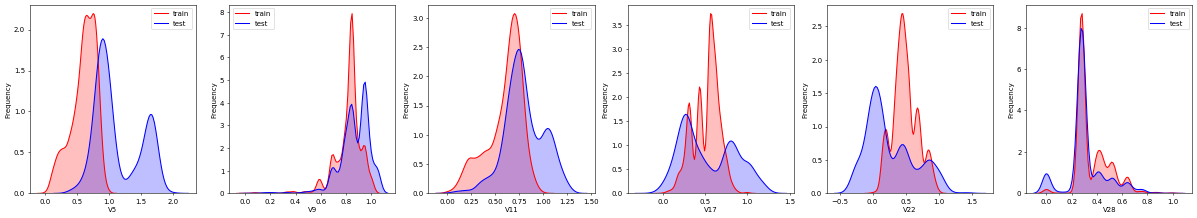

In [6]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row), dpi = 50)

for i, col in enumerate(["V5","V9","V11","V17","V22","V28"]):
    ax = plt.subplot(drop_row, drop_col, i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax= sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
plt.show()

## 特征相关性

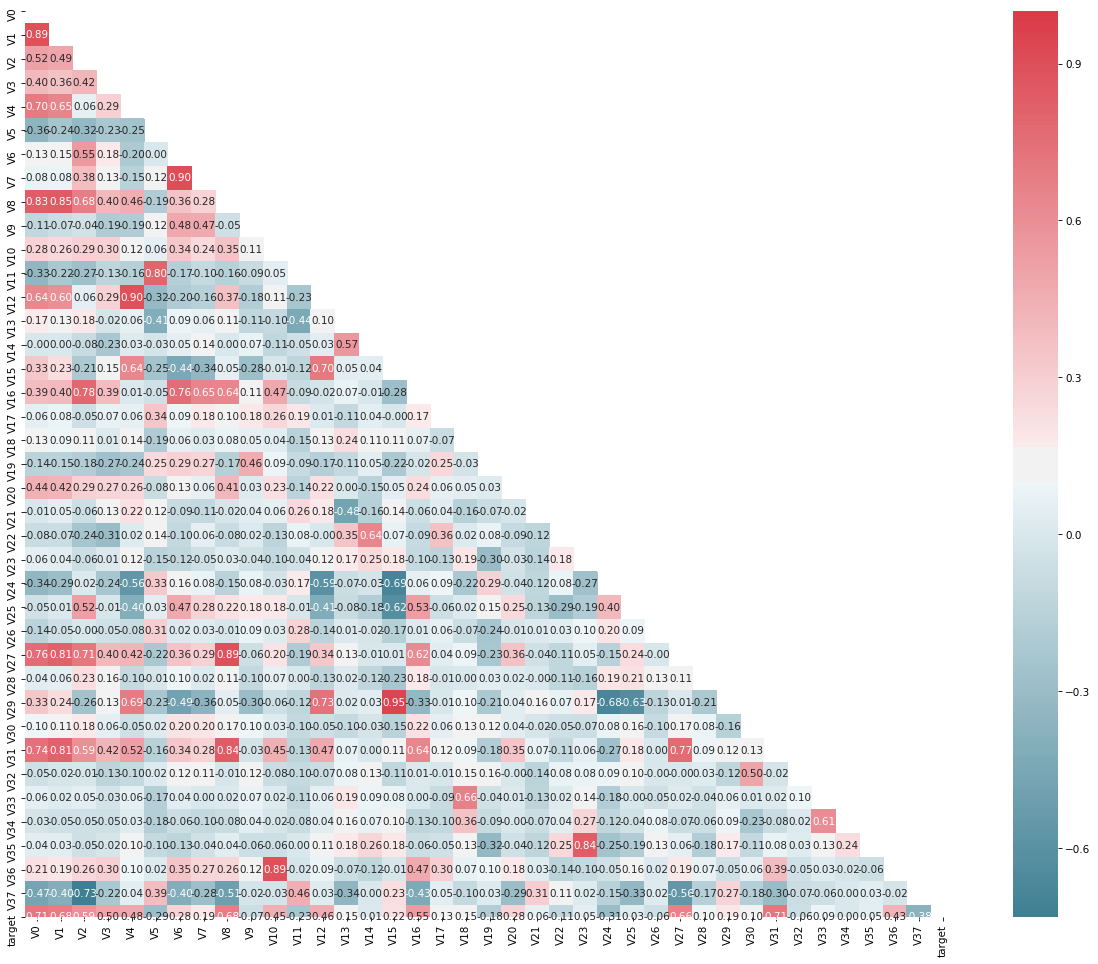

In [7]:
plt.figure(figsize=(20, 16), dpi = 75)  
column = train_data_scaler.columns.tolist()  
mcorr = train_data_scaler[column].corr(method = "spearman")  
mask = np.zeros_like(mcorr, dtype = np.bool)  
mask[np.triu_indices_from(mask)] = True  
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  
plt.show()

In [8]:
#相关性初筛，相关系数阈值0.3

mcorr = mcorr.abs()['target']
features_corr = mcorr.sort_values(ascending = False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr'] > 0.3]
print(features_corr_select)

select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
new_train_data_corr_select = train_data_scaler[select_features+['target']]
new_test_data_corr_select = test_data_scaler[select_features]

   features_and_target      corr
0               target  1.000000
1                   V0  0.712403
2                  V31  0.711636
3                   V1  0.682909
4                   V8  0.679469
5                  V27  0.657398
6                   V2  0.585850
7                  V16  0.545793
8                   V3  0.501622
9                   V4  0.478683
10                 V12  0.460300
11                 V10  0.448682
12                 V36  0.425991
13                 V37  0.376443
14                 V24  0.305526


## 多重共线性分析

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性，结果可以看出部分特征共线性问题严重
new_numerical = ['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
                 'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X = np.matrix(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

## PCA主成分分析 降维

In [18]:
from sklearn.decomposition import PCA

#保留90%主成分
#注意只fit训练集
pca = PCA(n_components = 0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2886.000000,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2886.000000,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,3.939253e-17,0.000000,1.969626e-17,4.924066e-18,6.647489e-17,-2.585135e-17,6.893693e-17,-5.539574e-17,-8.863319e-17,1.194086e-16,-7.139896e-17,1.181776e-16,0.000000,-3.323745e-17,-3.569948e-17,8.740217e-17,0.127274
std,3.998976e-01,0.350024,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,0.119330,1.149758e-01,1.133507e-01,1.019259e-01,0.983462
min,-1.071795e+00,-0.942948,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,-6.341045e-01,-5.906753e-01,-0.417515,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.044000
25%,-2.804085e-01,-0.261373,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,-8.202809e-02,-7.721868e-02,-0.071400,-7.474073e-02,-7.709743e-02,-6.603914e-02,-0.348500
50%,-1.417104e-02,-0.012772,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,7.286444e-03,-5.745946e-03,-0.004141,1.054915e-03,-1.758387e-03,-7.533392e-04,0.313000
75%,2.287306e-01,0.231772,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,8.833765e-02,7.148033e-02,0.067862,7.574868e-02,7.116829e-02,6.357449e-02,0.794250
max,1.597730e+00,1.382802,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,6.405187e-01,6.780732e-01,0.515612,4.978126e-01,4.673189e-01,4.570870e-01,2.538000


In [19]:
#保留16个主成分
pca = PCA(n_components = 16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,2.954440e-17,-9.848132e-18,2.462033e-17,9.848132e-18,7.386099e-17,-2.092728e-17,6.893693e-17,-4.308558e-17,-9.601929e-17,1.181776e-16,-7.386099e-17,1.194086e-16,-1.477220e-17,-3.693050e-17,-3.569948e-17,8.801768e-17,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133506e-01,1.019259e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103086e-01,-7.703992e-01,-5.340290e-01,-5.993768e-01,-5.870755e-01,-6.282824e-01,-4.902552e-01,-6.341348e-01,-5.906740e-01,-4.175270e-01,-4.311202e-01,-4.170462e-01,-3.602778e-01,-3.044000
25%,-2.804085e-01,-2.613726e-01,-2.090797e-01,-1.945195e-01,-1.315615e-01,-1.264097e-01,-1.236358e-01,-1.016439e-01,-9.662206e-02,-9.296986e-02,-8.202105e-02,-7.721898e-02,-7.139473e-02,-7.476490e-02,-7.708669e-02,-6.602283e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112169e-02,-2.337399e-02,-5.122968e-03,-1.355334e-02,-1.756345e-04,-4.656146e-03,2.579388e-03,-1.478043e-03,7.294031e-03,-5.736421e-03,-4.148727e-03,1.055806e-03,-1.807818e-03,-7.407372e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281659e-01,9.993105e-02,1.272071e-01,9.656998e-02,1.002731e-01,9.059782e-02,8.833992e-02,7.147345e-02,6.783742e-02,7.579072e-02,7.130330e-02,6.354054e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034060e+00,1.358962e+00,6.191607e-01,7.369995e-01,6.448938e-01,5.839579e-01,6.404877e-01,6.780721e-01,5.156436e-01,4.977975e-01,4.674034e-01,4.569212e-01,2.538000


## 文件输出

In [22]:
import pickle

new_train_pca_16.to_pickle('data/zhengqi_train_pca_16.pkl')
new_test_pca_16.to_pickle('data/zhengqi_test_pca_16.pkl')